In [1]:
import sys
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
import datetime
import numpy as np
import pandas_datareader as pdr
print(sys.version)
print(matplotlib.__version__)
print(np.__version__)
print(pdr.__version__)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
3.1.3
1.18.1
0.7.0


In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and others.
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'NortonLifeLock': 'NLOK',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Mitsubishi': 'MSBHY',
'Sony': 'SNE',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'}

companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mitsubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('NortonLifeLock', 'NLOK'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [14]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2017-01-01'
end_date = '2020-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=754, freq=None), MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NLOK', 'NOC', 'PEP', 'SNE', 'TM', 'TXN', 'VLO', 'WBA', 'XOM']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [15]:
print(panel_data.head())
print(panel_data.columns)
x, y = panel_data.shape
print("{} x {}".format(x, y))

Attributes        High                                                \
Symbols           AAPL        AMZN        AXP          BA        BAC   
Date                                                                   
2017-01-03  116.330002  758.760010  75.750000  157.139999  22.680000   
2017-01-04  116.510002  759.679993  76.550003  159.229996  22.959999   
2017-01-05  116.860001  782.400024  76.180000  159.699997  22.930000   
2017-01-06  118.160004  799.440002  75.919998  159.660004  22.850000   
2017-01-09  119.430000  801.770020  76.500000  159.240005  22.709999   

Attributes                                                       ...  \
Symbols            CVX      F         GE        HMC         IBM  ...   
Date                                                             ...   
2017-01-03  119.000000  12.60  30.615385  29.610001  167.869995  ...   
2017-01-04  118.650002  13.27  30.605770  30.670000  169.869995  ...   
2017-01-05  118.480003  13.22  30.528847  30.780001  169.389999

In [16]:
#panel_data.reshape(len(companies_dict))
panel_data_close = panel_data[['Close']]
stock_close = np.array(panel_data_close).T 
row, column = stock_close.shape
#stock_open = panel_data.loc['Open']
print(stock_close.shape)
#print(panel_data_close)
#print(stock_close)

(28, 754)


In [17]:
panel_data_open = panel_data[['Open']]
stock_open = np.array(panel_data_open).T 
print(stock_open.shape)
#print(panel_data_open)
#print(stock_open)

(28, 754)


In [42]:
movements = np.zeros([row, column])
#print(movements)
for i in range(0, row):
        movements[i, :] = np.subtract(stock_close[i, :], stock_open[i,:])
        
for i in range(0, len(companies)):
    print("Company {} moved {}".format(companies[i][0], sum(movements[i][:])))

Company Apple moved 109.580078125
Company Amazon moved -504.60015869140625
Company American Express moved 0.470123291015625
Company Boeing moved 85.99972534179688
Company Bank of America moved 0.7799644470214844
Company Chevron moved -38.81989288330078
Company Ford moved -6.680003643035889
Company General Electrics moved -18.749227046966553
Company Honda moved -9.17000961303711
Company IBM moved -48.94971466064453
Company Intel moved 15.54000473022461
Company Johnson & Johnson moved 6.119964599609375
Company Coca Cola moved 7.289997100830078
Company Lockheed Martin moved -47.93971252441406
Company MasterCard moved 51.199981689453125
Company McDonalds moved -10.049964904785156
Company Mitsubishi moved 1.4300346374511719
Company Microsoft moved -3.890026092529297
Company Navistar moved -30.379962921142578
Company NortonLifeLock moved nan
Company Northrop Grumman moved -24.72064208984375
Company Pepsi moved 7.750099182128906
Company Sony moved 2.2299633026123047
Company Toyota moved -16.1

(28, 754)


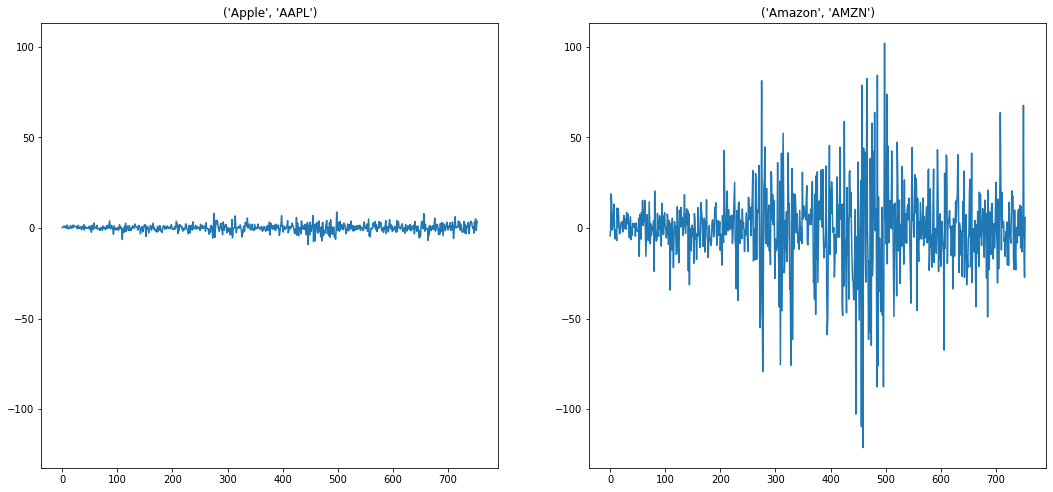

[[ 2.58999634e+00  3.40998840e+00  9.10003662e-01 ... -1.32000732e+00
   2.05999756e+00  3.72000122e+00]
 [ 1.67900391e+01  4.45000000e+01  4.09997559e+00 ... -1.31199951e+01
  -2.71099854e+01  5.83996582e+00]
 [ 1.19000244e+00  5.49995422e-01  6.90002441e-01 ... -6.49993896e-01
  -8.99993896e-01  1.99996948e-01]
 ...
 [ 0.00000000e+00  3.04000092e+00  4.70001221e-01 ... -1.58000183e+00
  -1.30004883e-01  7.00004578e-01]
 [ 3.00025940e-02  4.90001678e-01  2.99987793e-02 ...  1.00002289e-01
  -1.80000305e-01  1.39999390e-01]
 [ 1.20002747e-01 -2.00004578e-01 -1.10000610e-01 ... -3.09997559e-01
  -6.09992981e-01  7.60002136e-01]]


In [46]:
print(movements.shape)

#Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18, 18))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

movements=movements[:, ~np.isnan(movements).any(axis=0)]
print(movements)

In [47]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.5305111103639331
-0.3541219919938864
0.00046424700342886807


(28, 203)


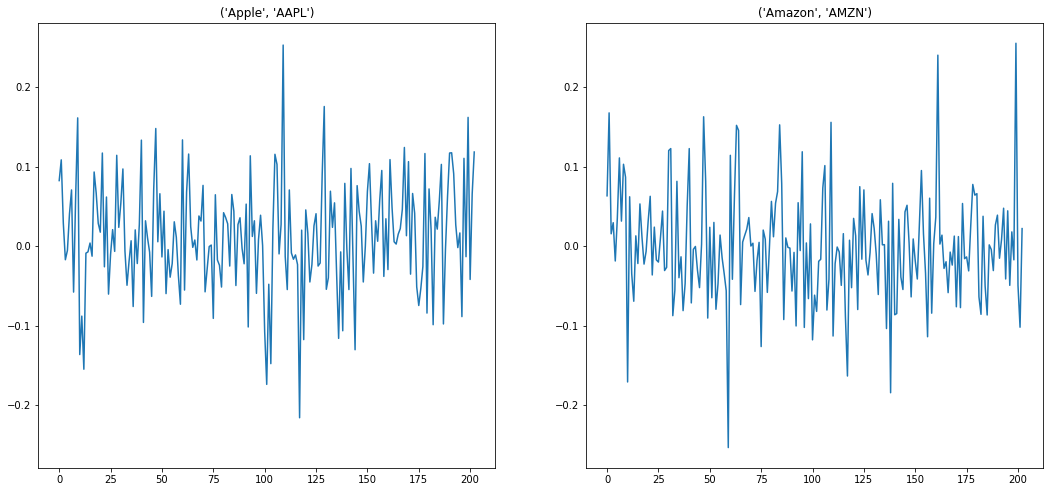

In [48]:
print(new.shape)

#Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18, 18))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [128]:
# Import necessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Define a normalizer
normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters = 10, max_iter = 10000)

# Make a pipline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [129]:
# Fit pipeline to daily stock movements
pipeline.fit(movements)

print(kmeans.inertia_)

9.22819507581109


In [130]:
# Predict the cluster labels
labels = pipeline.predict(movements)

# Create a Dataframe aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
0        0             (Apple, AAPL)
1        0            (Amazon, AMZN)
2        0   (American Express, AXP)
24       0  (Texas Instruments, TXN)
17       0         (Microsoft, MSFT)
14       0          (MasterCard, MA)
10       0             (Intel, INTC)
25       1      (Valero Energy, VLO)
27       1              (Exxon, XOM)
5        1            (Chevron, CVX)
11       2  (Johnson & Johnson, JNJ)
13       3    (Lockheed Martin, LMT)
3        3              (Boeing, BA)
20       3   (Northrop Grumman, NOC)
4        4    (Bank of America, BAC)
23       4              (Toyota, TM)
22       4               (Sony, SNE)
8        4              (Honda, HMC)
9        4                (IBM, IBM)
6        4                 (Ford, F)
7        4   (General Electrics, GE)
15       5          (McDonalds, MCD)
19       6    (NortonLifeLock, NLOK)
26       7           (Walgreen, WBA)
18       7           (Navistar, NAV)
21       8              (Pepsi, PEP)
1

In [131]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on the reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a Datafram aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                 companies
0        0             (Apple, AAPL)
1        0            (Amazon, AMZN)
24       0  (Texas Instruments, TXN)
10       0             (Intel, INTC)
15       1          (McDonalds, MCD)
25       2      (Valero Energy, VLO)
7        2   (General Electrics, GE)
27       2              (Exxon, XOM)
5        2            (Chevron, CVX)
14       3          (MasterCard, MA)
13       4    (Lockheed Martin, LMT)
11       4  (Johnson & Johnson, JNJ)
12       4           (Coca Cola, KO)
21       4              (Pepsi, PEP)
20       4   (Northrop Grumman, NOC)
22       5               (Sony, SNE)
19       5    (NortonLifeLock, NLOK)
16       5       (Mitsubishi, MSBHY)
23       5              (Toyota, TM)
18       6           (Navistar, NAV)
4        6    (Bank of America, BAC)
26       6           (Walgreen, WBA)
6        6                 (Ford, F)
3        7              (Boeing, BA)
2        8   (American Express, AXP)
17       8         (Microsoft, MSFT)
9

<Figure size 432x288 with 0 Axes>

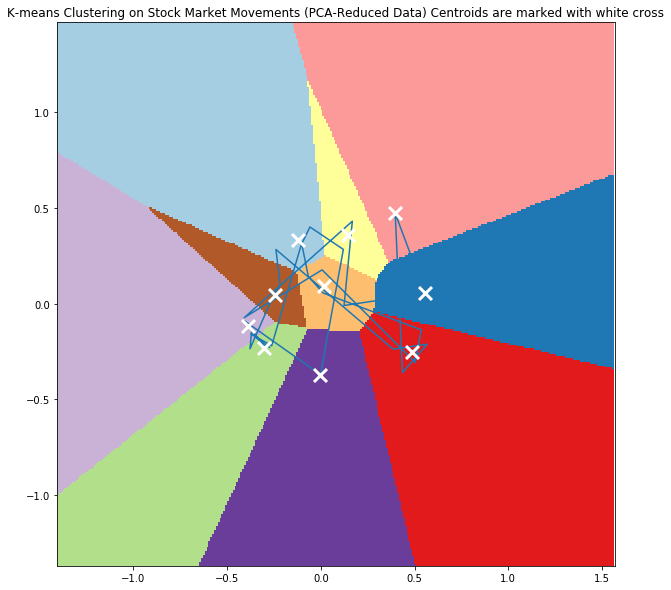

In [132]:
# Define step size of mesh.
h = 0.01

# Plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the results into a color plot
Z = Z.reshape(xx.shape)

# Define colorplot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize = (10, 10))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=cmap, aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], markersize=5)

# Plot the centroid of each cluster as a white 'X'
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker = 'x', s=169, linewidth=3,
           color = 'w', zorder=10)


plt.title('K-means Clustering on Stock Market Movements (PCA-Reduced Data) Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()